In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank_processed_data.csv')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'day_end', 'day_middle',
       'day_start', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [10]:
df.head()

,age,default,balance,housing,loan,campaign,pdays,previous,deposit,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,1,-1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,1,-1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,2,-1,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [15]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'day_end', 'day_middle',
       'day_start', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### Does distribution of account balances vary with whether or not somone has home loan?

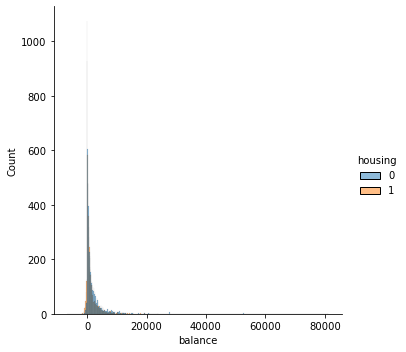

In [14]:
sns.displot(data=df, x='balance', hue='housing');

### Does distribution of account balances vary with whether or not someonas has defaulted?

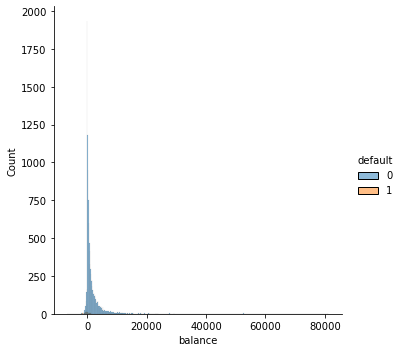

In [17]:
sns.displot(data=df, x='balance', hue='default');

### Looking at distribution of positive outcomes by marital status

In [20]:
df.groupby(['marital_single', 'marital_married', 'marital_divorced'])['deposit'].mean()

marital_single  marital_married  marital_divorced
0               0                1                   0.481052
                1                0                   0.433790
1               0                0                   0.543491
Name: deposit, dtype: float64

In [32]:
df[df['marital_single'] == 1]['balance'].describe()

count     3518.000000
mean      1457.255259
std       2940.061288
min      -1139.000000
25%        145.000000
50%        539.500000
75%       1583.750000
max      56831.000000
Name: balance, dtype: float64

In [33]:
df[df['marital_married'] == 1]['balance'].describe()

count     6351.000000
mean      1599.927570
std       3380.652168
min      -6847.000000
25%        122.000000
50%        580.000000
75%       1812.500000
max      81204.000000
Name: balance, dtype: float64

In [34]:
df[df['marital_divorced'] == 1]['balance'].describe()

count     1293.000000
mean      1371.835267
std       3178.803624
min      -2282.000000
25%         49.000000
50%        439.000000
75%       1612.000000
max      52587.000000
Name: balance, dtype: float64

### Looking at distribution of positive outcomes by education level

In [122]:
ed = df.groupby(['education_primary', 'education_secondary', 
            'education_tertiary', 'education_unknown'])['deposit'].mean().reset_index()

In [162]:
x = list(ed.columns)[:-1][::-1]
x  = [i[i.index('_')+1:] for i in x]
y = ed['deposit'].values

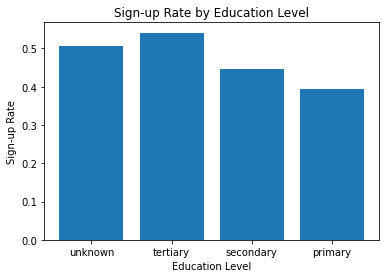

In [163]:
plt.bar(x,y);
plt.xlabel('Education Level');
plt.ylabel('Sign-up Rate');
plt.title('Sign-up Rate by Education Level');

### Examine distribution of positive outcomes by day of month when the customer was contacted

In [22]:
df.groupby(['day_start', 'day_middle', 'day_end'])['deposit'].mean()

day_start  day_middle  day_end
0          0           1          0.456919
           1           0          0.470128
1          0           0          0.499190
Name: deposit, dtype: float64

### Examine distribution of positive outcomes by job type

In [151]:
job = pd.DataFrame(df.groupby(['job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown'])['deposit'].mean()).reset_index()

In [153]:
x = list(job.columns)[:-1][::-1]
x = [i[4:] for i in x]
y = job['deposit'].values

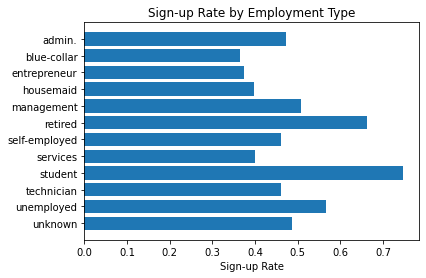

In [160]:
plt.barh(x,y);
plt.title('Sign-up Rate by Employment Type');
plt.xlabel('Sign-up Rate');

In [38]:
pd.DataFrame(df.groupby(['month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'])['deposit'].count())

deposit
month_apr month_aug month_dec month_feb month_jan month_jul month_jun month_mar month_may month_nov month_oct month_sep         
0         0         0         0         0         0         0         0         0         0         0         1              319
                                                                                                    1         0              392
                                                                                          1         0         0              943
                                                                                1         0         0         0             2824
                                                                      1         0         0         0         0              276
                                                            1         0         0         0         0         0             1222
                                                  1         0         0         0         0         0         0             1514
                                        1         0         0         0         0         0         0         0              344
                              1         0         0         0         0         0         0         0         0              776
                    1         0         0         0         0         0         0         0         0         0              110
          1         0         0         0         0         0         0         0         0         0         0             1519
1         0         0         0         0         0         0         0         0         0         0         0              923

In [83]:
monthly_signup_rate = pd.DataFrame(df.groupby(['month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'])['deposit'].mean()).reset_index()

x = list(monthly_signup_rate.columns)
x = [i[-3:] for i in x][:-1][::-1]
y = monthly_signup_rate['deposit'].values

In [84]:
signup_rate = dict(zip(x,y))

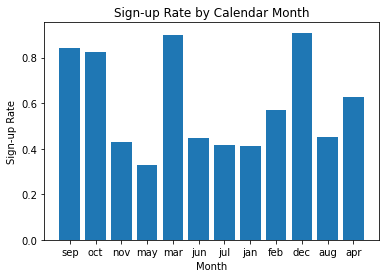

In [143]:
plt.bar(signup_rate.keys(), signup_rate.values());
plt.xlabel('Month');
plt.ylabel('Sign-up Rate');
plt.title('Sign-up Rate by Calendar Month');

### Examine distribution of positive outcomes based on customer's financial situation

In [26]:
df.groupby('default')['deposit'].mean()

default
0    0.476351
1    0.309524
Name: deposit, dtype: float64

In [27]:
df.groupby('housing')['deposit'].mean()

housing
0    0.570311
1    0.366408
Name: deposit, dtype: float64

In [28]:
df.groupby('loan')['deposit'].mean()

loan
0    0.495259
1    0.331507
Name: deposit, dtype: float64

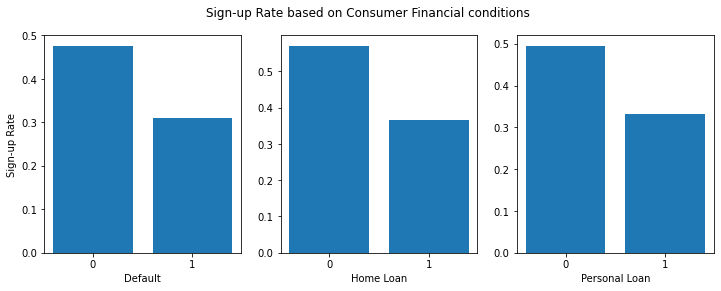

In [144]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3);
fig.set_size_inches(12, 4)
fig.suptitle('Sign-up Rate based on Consumer Financial conditions')
ax1.bar(df.groupby('default')['deposit'].mean().index,df.groupby('default')['deposit'].mean().values);
ax1.set_xlabel('Default');
ax1.set_ylabel('Sign-up Rate');
ax1.set_xticks([0,1]);

ax2.bar(df.groupby('housing')['deposit'].mean().index, df.groupby('housing')['deposit'].mean().values);
ax2.set_xlabel('Home Loan');
ax2.set_xticks([0,1]);

ax3.bar(df.groupby('loan')['deposit'].mean().index, df.groupby('loan')['deposit'].mean().values);
ax3.set_xlabel('Personal Loan');
ax3.set_xticks([0,1]);